# K-Means (Centroid)

K-means (MacQueen, 1967) is a partitional clustering algorithm.

- process of K-Means
1. Fix the number of clusters to K.
2. Find the best clustering according to the criterion function. (number of clusters may vary)

- feature of K-Means
1. Clustering is one of the types of unsupervised learning.
2. It is similar to classification: the aim is to give a label to each data point.
3. However, unlike in classification, we are not given any examples of labels associated with the data points. 

The K-Means algorithm partitions the given data into K clusters.
1. Each cluster has a cluster center, called centroid.
2. K is specified by the user.

***


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.datasets import make_blobs
from math import sqrt

In [2]:
class KMeans():
  def __init__(self, input_k, input_points, input_centroids):
    self.k = input_k
    self.centroids = input_centroids
    self.points = input_points
    self.output_centroids = None
    self.output_points = None
    self.prev_pts = None
    self.prev_cts = None
    self.inertia = None

  def showPlot(self):
    cts_X = np.array(self.centroids)[:, 0]
    cts_y = np.array(self.centroids)[:, 1]

    pts_X = np.array(self.points)[:, 0]
    pts_y = np.array(self.points)[:, 1]
    pts_c = np.array(self.points)[:, 2]

    plt.scatter(pts_X, pts_y, c = pts_c, alpha = 0.5)
    plt.scatter(cts_X, cts_y, c = 'red')
    plt.show()
    
  def calInertia(self): # 제곱합 = 모든 데이터를 제곱한 값의 합 - (모든 데이터를 합한 값) ** 2 / 데이터의 개수
    totalDistances = []
    for i in range(len(self.output_points)):
        index = self.output_points[i][-1]
        distance = sqrt((self.output_centroids[index][0] - self.output_points[i][0]) ** 2 + (self.output_centroids[index][1] - self.output_points[i][1]) ** 2)
        totalDistances.append([distance])
    totalDistances = np.array(totalDistances)
    ss = (totalDistances ** 2).sum() - totalDistances.sum() ** 2 / len(self.output_points)
    self.inertia = ss

  def finalizeCentroid(self):
    k = copy.deepcopy(self.k)
    pts = copy.deepcopy(self.points)
    cts = []
    for i in range(k):
      cts.append([[], []])
    
    for i in range(len(pts)):
      cts[pts[i][-1]][0].append(pts[i][0])
      cts[pts[i][-1]][1].append(pts[i][1])

    for i in range(len(cts)):
      cts[i] = [sum(cts[i][0]) / len(cts[i][0]), sum(cts[i][1]) / len(cts[i][1])]
      

    self.output_centroids = cts

  def setCentroid(self, iter = 0):

    k = copy.deepcopy(self.k)
    pts = copy.deepcopy(self.points)
    cts = copy.deepcopy(self.centroids)

#     print(f'{iter} points: {pts}')
#     print(f'{iter} centroids: {cts}')

    if iter == 0:
      print(f'iter = {iter}')
      for i in range(len(pts)):
        point_length = []
        for j in range(k):
          point_length.append(sqrt((pts[i][0] - cts[j][0]) ** 2 + (pts[i][1] - cts[j][1]) ** 2))
        nearest = point_length.index(min(point_length))
#         print(f'index = {point_length}, min index: {nearest}')
        pts[i].append(nearest)
#       print(pts)
      self.points = pts
      self.showPlot()
      self.setCentroid(iter + 1)
      self.showPlot()
    else:

      prev_pts = pts
      prev_cts = cts

      print(f'iter = {iter}')
      # 값들의 중점으로 centroid 재설정
      cts = []
      for i in range(k):
        cts.append([[], []])

#       print(f'empty cts = {cts}')

      for i in range(len(pts)):
        cts[pts[i][-1]][0].append(pts[i][0])
        cts[pts[i][-1]][1].append(pts[i][1])

#       print(f'####### cts: {cts}')

      for i in range(len(cts)):
        cts[i] = [sum(cts[i][0]) / len(cts[i][0]), sum(cts[i][1]) / len(cts[i][1])]

      self.centroids = cts

      # 재설정 된 centroid를 바탕으로 가장 가까운 거리 재검색
      for i in range(len(pts)):
        point_length = []
        for j in range(k):
          point_length.append(sqrt((pts[i][0] - cts[j][0]) ** 2 + (pts[i][1] - cts[j][1]) ** 2))
        nearest = point_length.index(min(point_length))
#         print(f'index = {point_length}, min index: {nearest}')
        pts[i][-1] = nearest
#       print(pts)
      self.points = pts
      self.showPlot()
      if cts == prev_cts:
#         print(f'*************pts = {pts}, prev_pts = {prev_pts}')
        self.finalizeCentroid()
        self.output_points = pts
        self.showPlot()
#         print(f'return value = {pts}')
        print(f'return centroids = {cts}')
        print(f'final iteration = {iter}')
        return
      self.setCentroid(iter + 1)

In [3]:
def randRange(start, end, n):
  li = []
  for i in range(n):
    print(f'least = {start}, maximum = {end}')
    li.append(np.random.randint(start, end))
  return li

In [4]:
# # X_rand = [i / 10 for i in randRange(-100, 100, 10)]
# y_rand = [i / 10 for i in randRange(-100, 100, 10)]

In [5]:
# points = []
# for i in range(len(X_rand)):
#   points.append([X_rand[i], y_rand[i]])

In [6]:
def generatePoints(n):
  points = []
  X_pts = [i / 10 for i in randRange(-100, 100, n)]
  y_pts = [i / 10 for i in randRange(-100, 100, n)]

  for i in range(len(X_pts)):
    points.append([X_pts[i], y_pts[i]])
  print(f'generated points = {points}')
  return points

In [7]:
# points

In [8]:
def generateCentroids(k, Xmin, Xmax, ymin, ymax):
  centroids = []
  X_cent = [i / 10 for i in randRange(10 * Xmin, Xmax * 10, k)]
  y_cent = [i / 10 for i in randRange(10 * ymin, ymax * 10, k)]

  for i in range(len(X_cent)):
    centroids.append([X_cent[i], y_cent[i]])
  print(f'generated centroids = {centroids}')
  return centroids

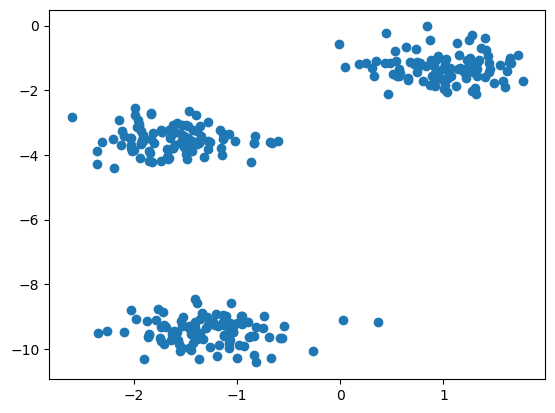

In [9]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.4, random_state=np.random.randint(0, 5))
plt.scatter(X[:,0], X[:,1])

In [10]:
X

array([[-8.27603687e-01, -3.41140886e+00],
       [-1.53706167e+00, -3.34552351e+00],
       [ 1.01970012e+00, -1.07932881e+00],
       [-1.38420019e+00, -3.67658133e+00],
       [-1.12735546e+00, -9.25496519e+00],
       [ 1.44634799e+00, -1.14543021e+00],
       [-1.17747378e+00, -9.87698698e+00],
       [-1.40550524e+00, -9.17307067e+00],
       [-2.14374713e+00, -2.91888411e+00],
       [-1.62224515e+00, -3.78790213e+00],
       [-2.34388174e+00, -9.51805641e+00],
       [-1.61729799e+00, -3.77446244e+00],
       [ 1.01614994e+00, -1.22991675e+00],
       [-1.37140098e+00, -1.03093203e+01],
       [-1.65822909e+00, -3.24465472e+00],
       [-1.76867362e+00, -8.75968471e+00],
       [-5.45968868e-01, -9.30519941e+00],
       [-1.13192414e+00, -8.93762182e+00],
       [-1.28009805e+00, -9.26453433e+00],
       [ 8.27486119e-01, -1.26662678e+00],
       [ 1.24739506e+00, -4.52660441e-01],
       [-1.13043172e+00, -3.49511576e+00],
       [-2.02726322e+00, -3.48567058e+00],
       [-1.

In [11]:
# while True:
#   try:
#     cent = generateCentroids(3, X[:, 0].min(), X[:, 0].max())
#     X = X.tolist()
#     model = KMeans(3, X, cent)
#     model.setCentroid()
#     break
#   except:
#     continue

In [12]:
X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()

(-2.600475676797771,
 1.766512344113814,
 -10.418916639842159,
 -0.02916575981610947)

In [13]:
cent = generateCentroids(3, X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
# cent = [[2.7, 2.4], [2.7, 2.6], [2.7, 2.5]]
# X = X.tolist()
model = KMeans(3, X, cent)
cent

least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
generated centroids = [[1.0, -8.9], [-1.9, -0.4], [-0.2, -6.0]]


[[1.0, -8.9], [-1.9, -0.4], [-0.2, -6.0]]

least = -26.00475676797771, maximum = 17.66512344113814
least = -104.18916639842159, maximum = -0.2916575981610947
generated centroids = [[0.3, -3.8]]
iter = 0


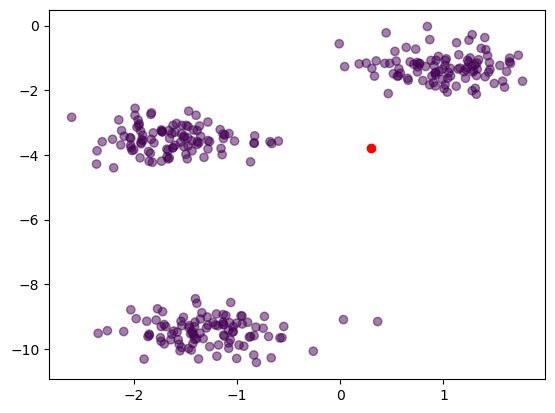

iter = 1


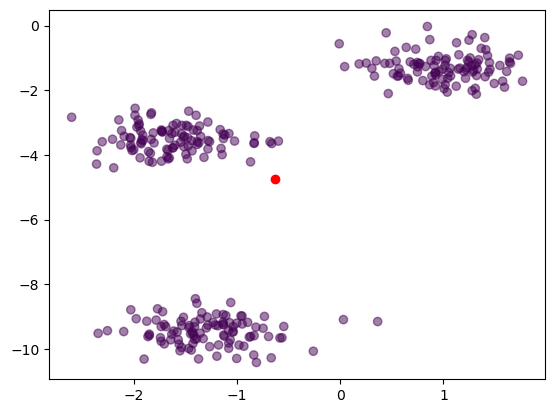

iter = 2


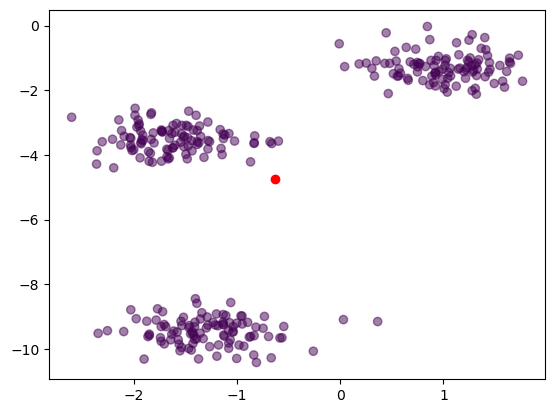

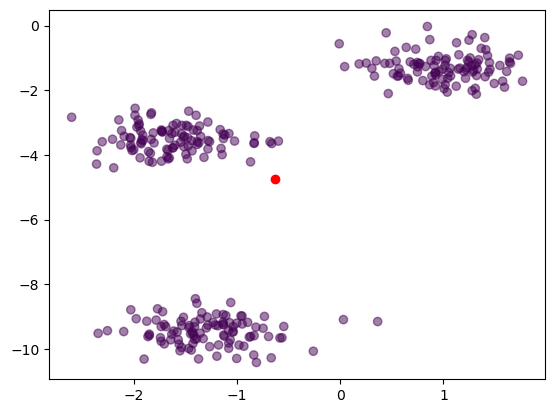

return centroids = [[-0.6313770497795123, -4.753919698380962]]
final iteration = 2


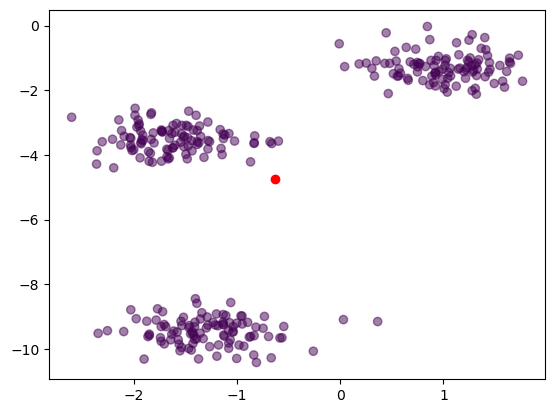

least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
generated centroids = [[-0.1, -7.4], [1.4, -8.0]]
iter = 0


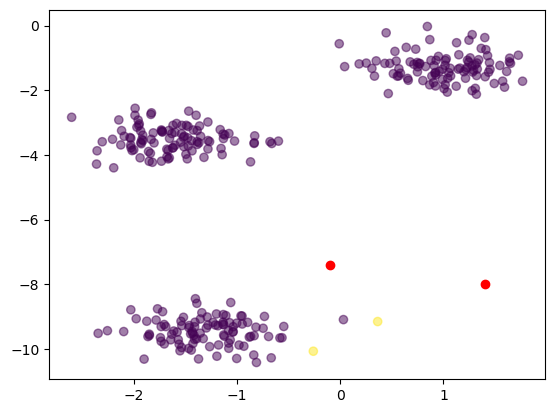

iter = 1


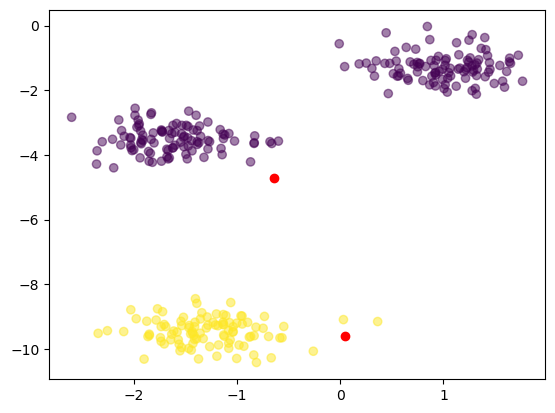

iter = 2


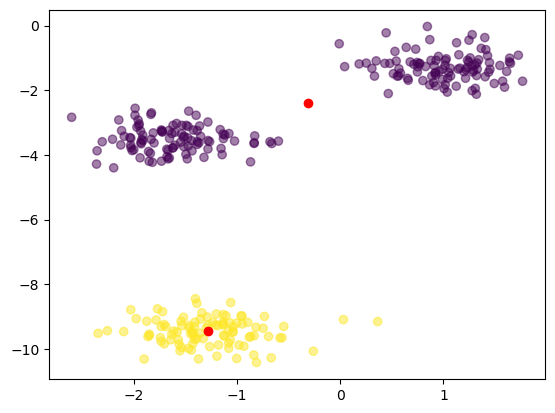

iter = 3


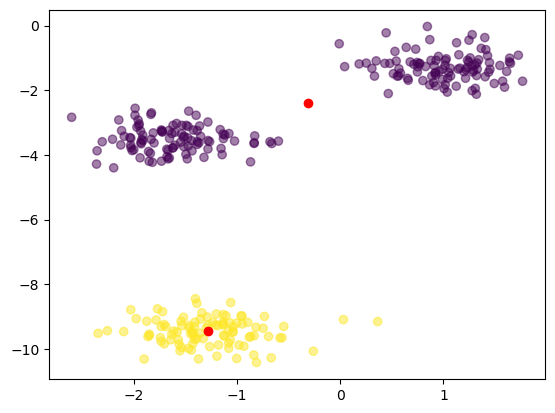

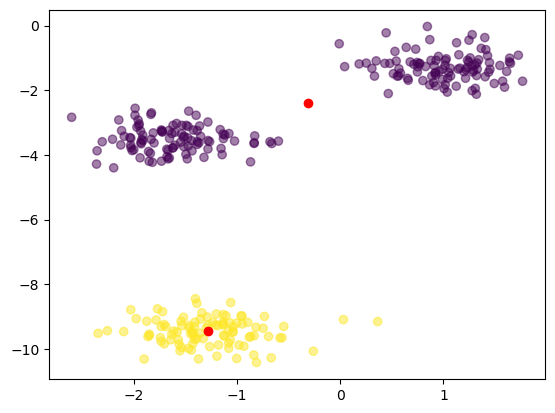

return centroids = [[-0.3077233763108758, -2.4006578987965987], [-1.278684396716785, -9.460443297549688]]
final iteration = 3


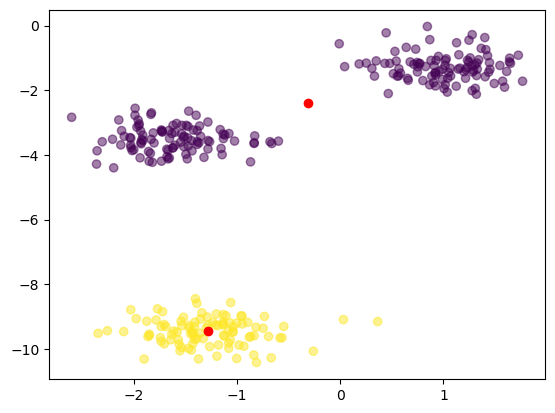

least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
generated centroids = [[-1.3, -0.8], [0.2, -0.1], [0.8, -8.9]]
iter = 0


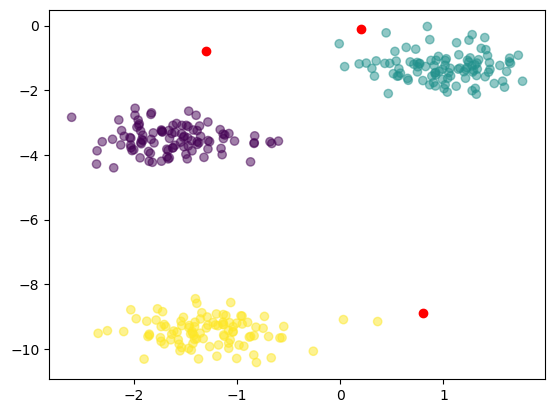

iter = 1


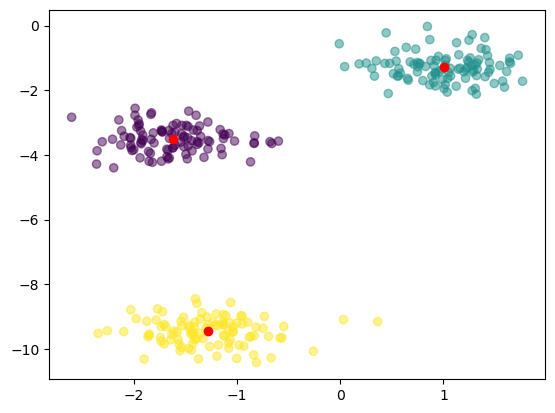

iter = 2


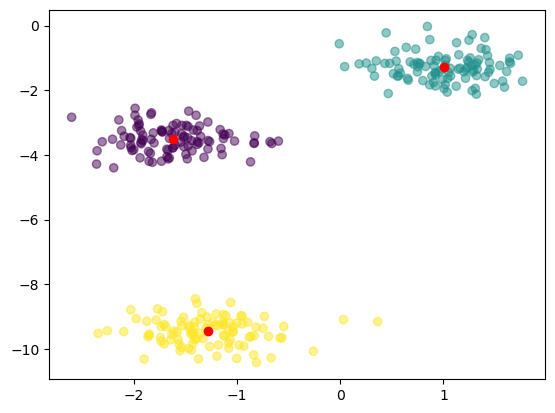

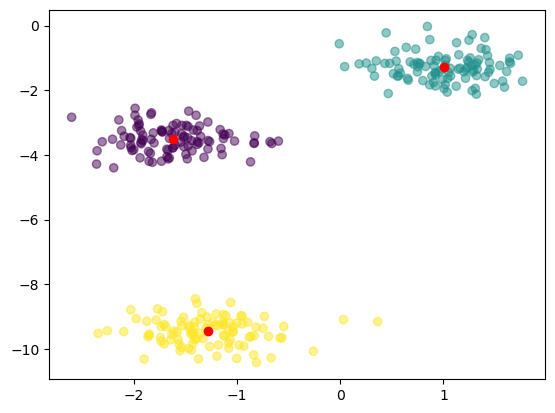

return centroids = [[-1.620066767796298, -3.515014997400736], [1.004620015174545, -1.286300800192463], [-1.278684396716785, -9.460443297549688]]
final iteration = 2


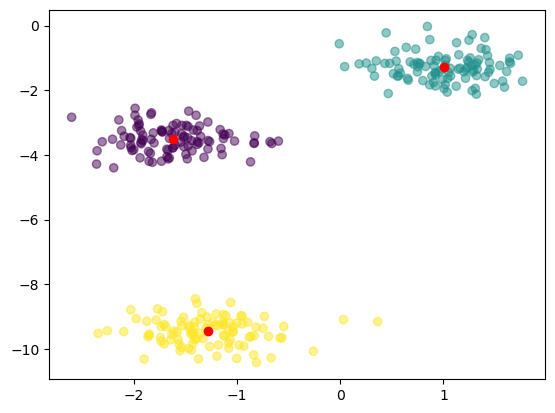

least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
generated centroids = [[1.0, -3.8], [0.7, -2.6], [-0.7, -6.4], [1.0, -7.2]]
iter = 0


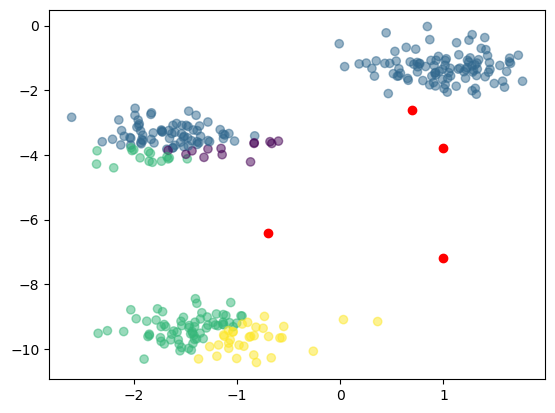

iter = 1


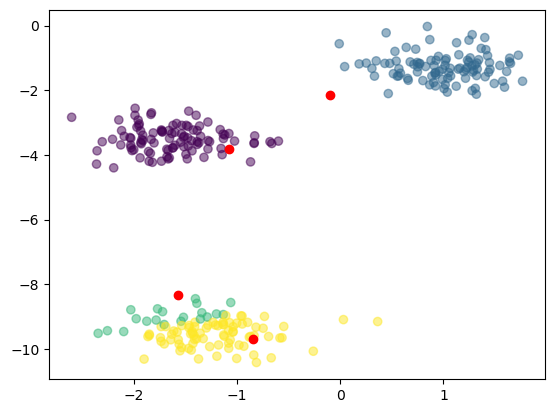

iter = 2


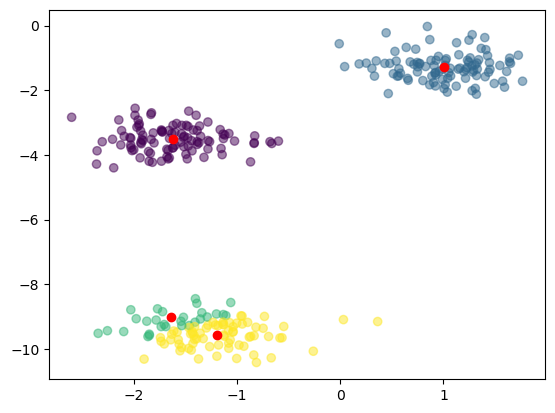

iter = 3


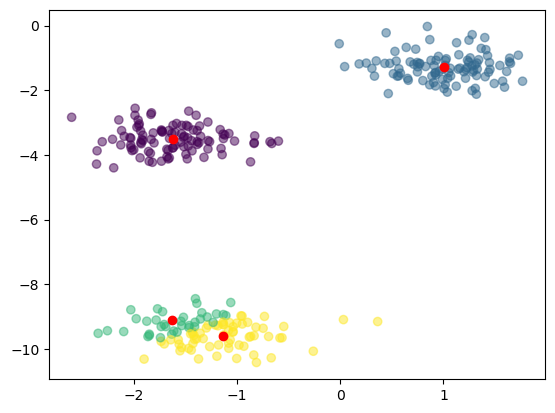

iter = 4


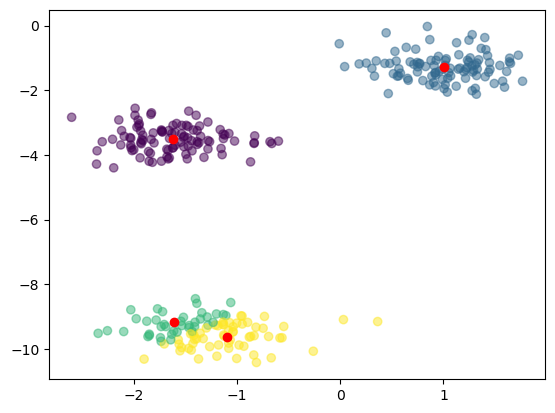

iter = 5


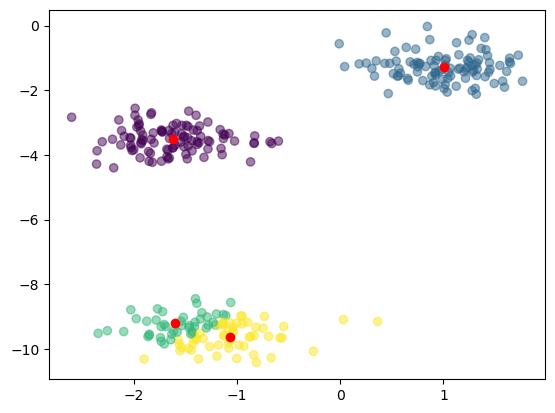

iter = 6


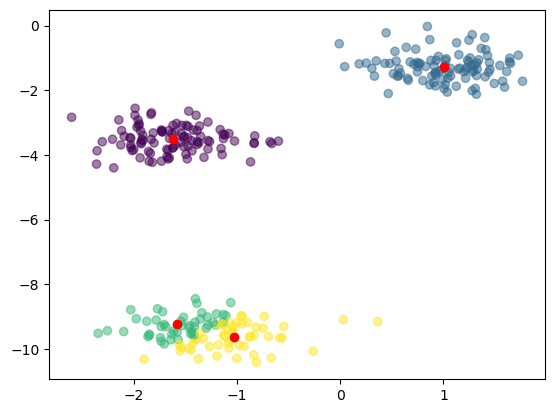

iter = 7


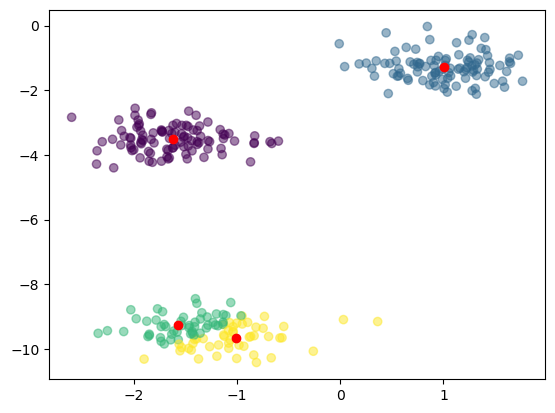

iter = 8


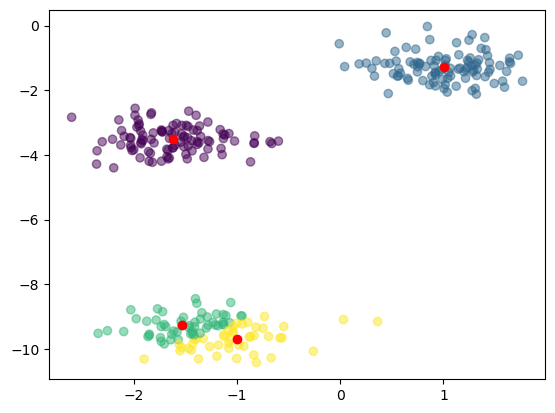

iter = 9


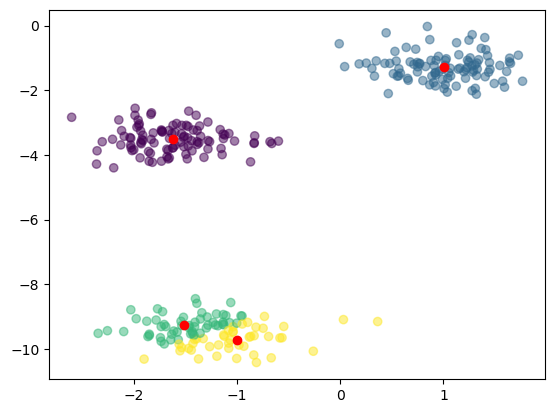

iter = 10


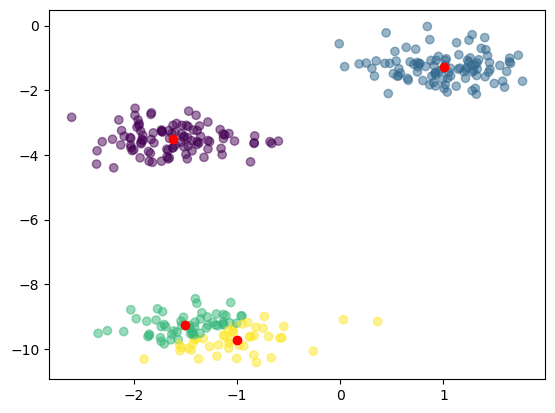

iter = 11


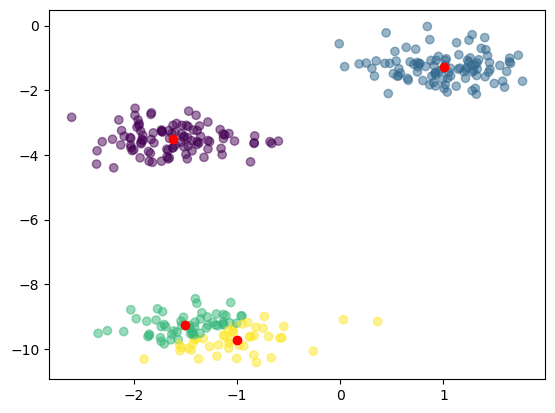

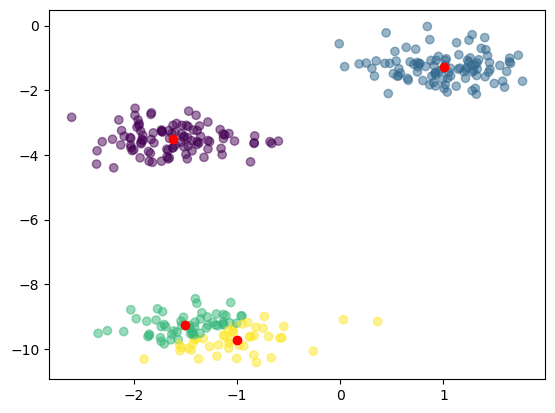

return centroids = [[-1.620066767796298, -3.515014997400736], [1.004620015174545, -1.286300800192463], [-1.4999134558886085, -9.245847048521364], [-0.9971201395890087, -9.733565796313012]]
final iteration = 11


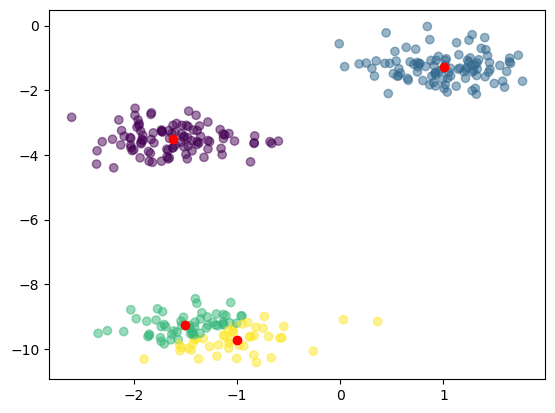

least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -26.00475676797771, maximum = 17.66512344113814
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
least = -104.18916639842159, maximum = -0.2916575981610947
generated centroids = [[-0.6, -0.6], [0.7, -10.0], [-2.4, -1.5], [-0.5, -4.7], [1.1, -9.4]]
iter = 0


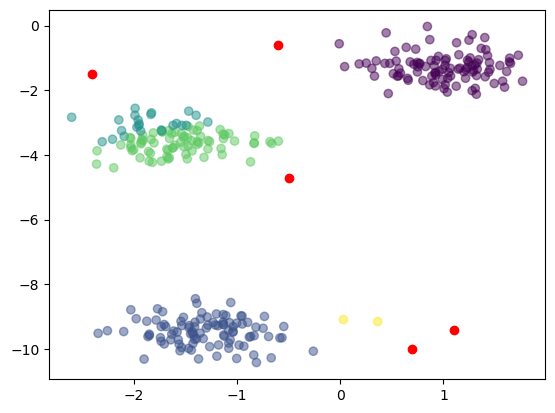

iter = 1


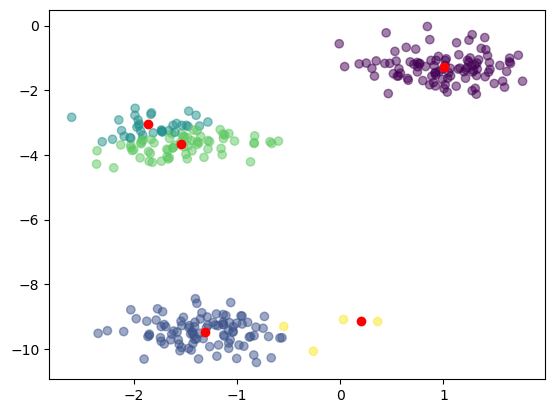

iter = 2


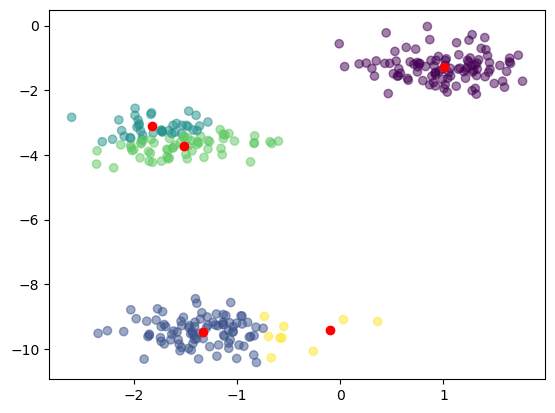

iter = 3


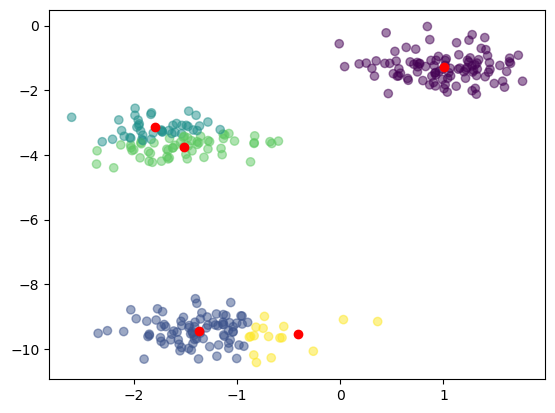

iter = 4


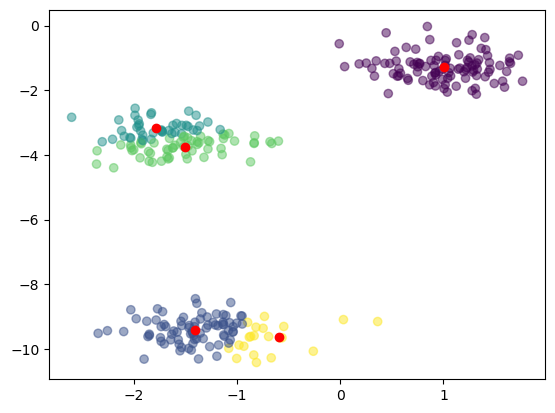

iter = 5


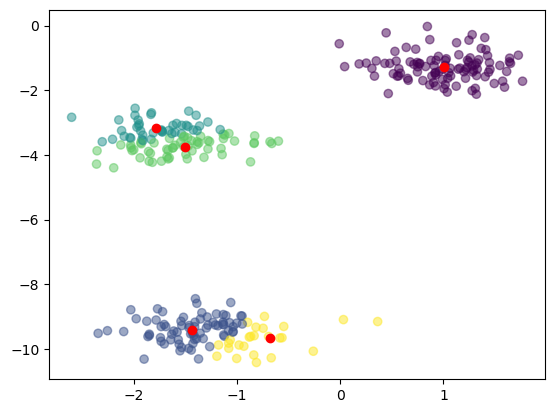

iter = 6


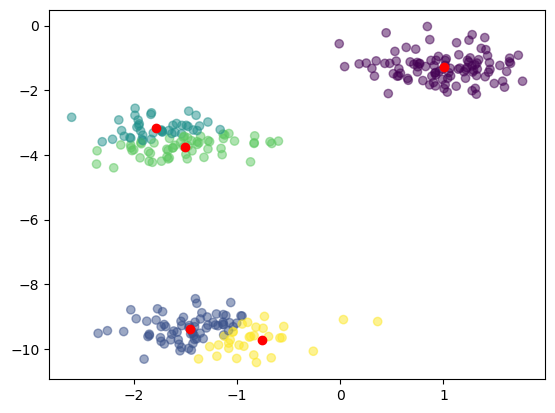

iter = 7


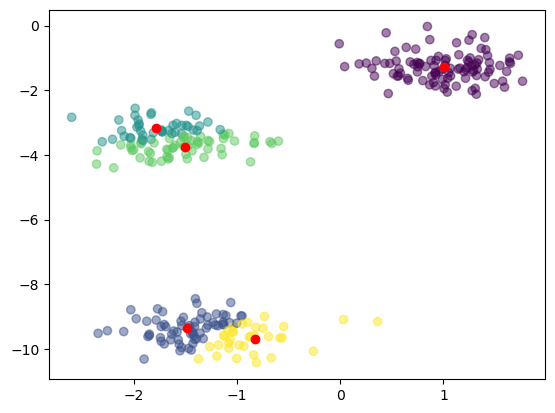

iter = 8


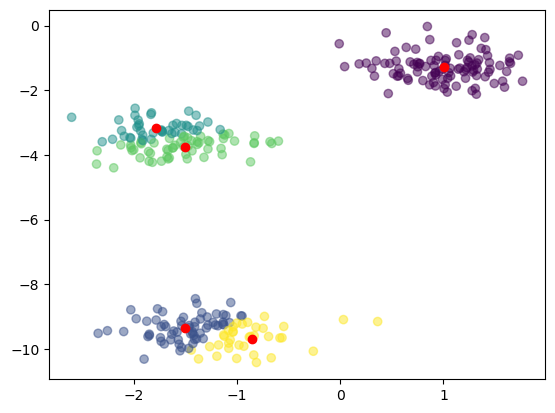

iter = 9


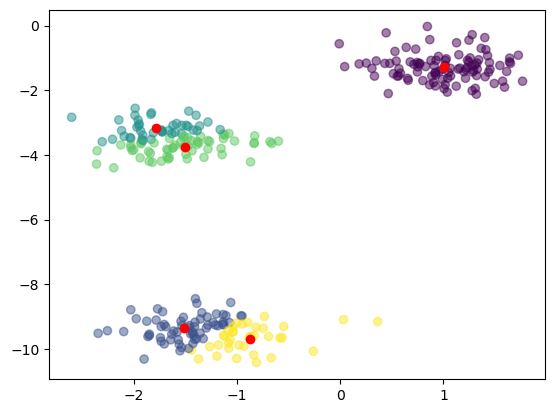

iter = 10


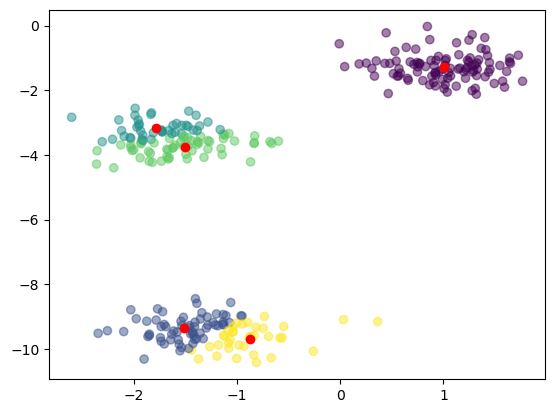

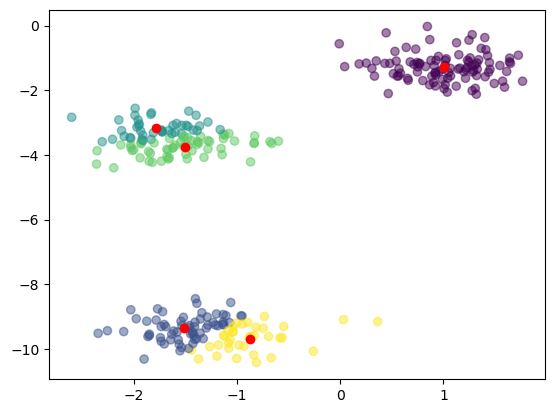

return centroids = [[1.004620015174545, -1.286300800192463], [-1.5087199491691363, -9.33806311178859], [-1.7808297126485297, -3.165244377291094], [-1.5036522215239907, -3.768297170583575], [-0.8697323034681594, -9.678008072236086]]
final iteration = 10


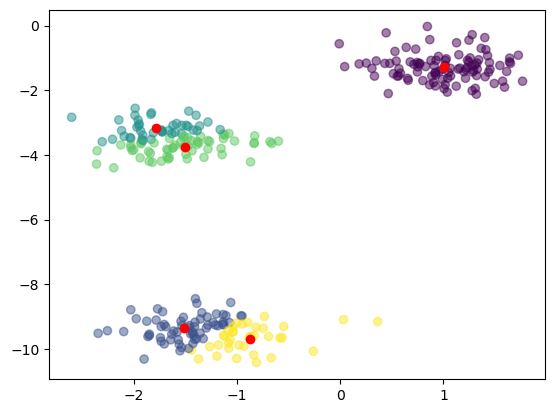

[567.4765448571716,
 139.79184262957995,
 21.936685441532845,
 19.72266583760478,
 18.299812168203644]

In [14]:
inertias = []
for i in range(1, 6):
    cent = generateCentroids(i, X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
    X = X.tolist()
    model = KMeans(i, X, cent)
    model.setCentroid()
    model.calInertia()
    inertias.append(model.inertia)
    X = np.array(X)
inertias

In [15]:
inertias

[567.4765448571716,
 139.79184262957995,
 21.936685441532845,
 19.72266583760478,
 18.299812168203644]

Text(0.5, 1.0, 'ELBOW')

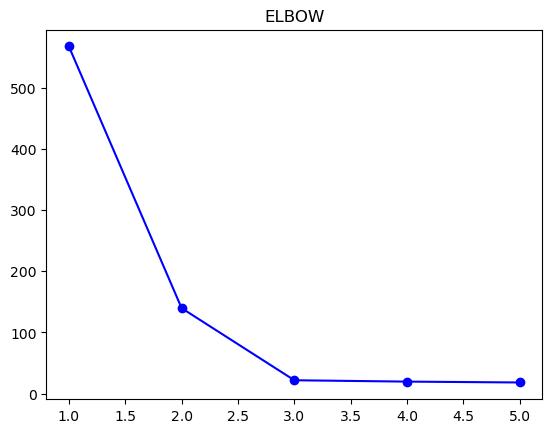

In [16]:
plt.plot(range(1, 6), inertias, 'bo-')
plt.title("ELBOW")